<a href="https://colab.research.google.com/github/7tiesdan/IntroToPythonLCC/blob/main/PythonProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
#check to see which fields contain any null data#
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [4]:
df['number_of_medications'] = df['num_medications'].astype(int)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,number_of_medications
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,18
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,13
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,16
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,8


In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,number_of_medications
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,16.021844
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,8.127566
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,10.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,15.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,20.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,81.000000


In [7]:
df.shape

(101766, 51)

In [8]:
##Confirm hypothesis that entries for patient_nbr field are non-unique, and therefore representing multiple instances##

df['patient_nbr'].is_unique

False

In [9]:
#exploring average time of days in hospital per patient#
df['time_in_hospital'].mean()

4.395986871843248

In [10]:
##First round of subsetting data to filter out unwanted data, leaving columns with medicine prescribed, while removing admission type ID, discharge, admission Source, payer code, number of procedures, and diagnoses##

FirstFilter = df[['patient_nbr', 'encounter_id', 'race', 'gender', 'age', 'weight', 'time_in_hospital', 'medical_specialty', 'num_medications', 'max_glu_serum', 'A1Cresult', 'diabetesMed', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'readmitted'
]]

In [11]:

FirstFilter.head()

,patient_nbr,encounter_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_medications,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
0,8222157,2278392,Caucasian,Female,[0-10),?,1,Pediatrics-Endocrinology,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,149190,Caucasian,Female,[10-20),?,3,?,18,NaN,...,No,No,Up,No,No,No,No,No,Ch,>30
2,86047875,64410,AfricanAmerican,Female,[20-30),?,2,?,13,NaN,...,No,No,No,No,No,No,No,No,No,NO
3,82442376,500364,Caucasian,Male,[30-40),?,2,?,16,NaN,...,No,No,Up,No,No,No,No,No,Ch,NO
4,42519267,16680,Caucasian,Male,[40-50),?,1,?,8,NaN,...,No,No,Steady,No,No,No,No,No,Ch,NO


Renamed column "Time_in_hospital" to "hospital_days" to help clarify that this is showing how many *days* the patient was in the hospital.
Then used the "T" function to swap the horizontal column names to appear vertical for better assessment.

In [12]:
FirstFilter = FirstFilter.rename(columns={'time_in_hospital': 'hospital_days'})
FirstFilter.head().T

,0,1,2,3,4
patient_nbr,8222157,55629189,86047875,82442376,42519267
encounter_id,2278392,149190,64410,500364,16680
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
hospital_days,1,3,2,2,1
medical_specialty,Pediatrics-Endocrinology,?,?,?,?
num_medications,1,18,13,16,8
max_glu_serum,NaN,NaN,NaN,NaN,NaN


In [13]:

FirstFilter.groupby(['gender'])['patient_nbr'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: patient_nbr, dtype: int64

In [14]:
FirstFilter.groupby(['race'])['patient_nbr'].count()

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: patient_nbr, dtype: int64

In [15]:
FirstFilter.groupby(['age'])['patient_nbr'].count().sort_values(ascending=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: patient_nbr, dtype: int64

Calculating total number of unique patients in this dataset, by referencing the 'patient_nbr' field.

In [16]:
##Calculating UNIQUE number of patients in this FirstFilter dataframe##

FirstFilter['patient_nbr'].nunique(dropna=True)

71518

In [17]:
##New data frame, filtering out those rows with "No" value for column "diabetesMed", to analyze how many patients are represented##

NoMeds = FirstFilter[FirstFilter['diabetesMed'] == 'No']
NoMeds.groupby(['gender'])['patient_nbr'].count()

gender
Female             12921
Male               10481
Unknown/Invalid        1
Name: patient_nbr, dtype: int64

In [18]:
NoMeds.head()

,patient_nbr,encounter_id,race,gender,age,weight,hospital_days,medical_specialty,num_medications,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
0,8222157,2278392,Caucasian,Female,[0-10),?,1,Pediatrics-Endocrinology,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
22,63000108,182796,AfricanAmerican,Female,[70-80),?,2,?,12,NaN,...,No,No,No,No,No,No,No,No,No,NO
23,107400762,183930,Caucasian,Female,[80-90),?,11,?,19,NaN,...,No,No,No,No,No,No,No,No,No,>30
50,21820806,550098,AfricanAmerican,Male,[50-60),?,4,?,14,NaN,...,No,No,No,No,No,No,No,No,No,<30
70,95075649,870294,Caucasian,Female,[70-80),?,7,?,22,NaN,...,No,No,No,No,No,No,No,No,No,<30


In [19]:
##Calculating how many rows appear with NoMeds filter applied##
NoMeds['patient_nbr'].count()


23403

In [20]:
NoMeds['patient_nbr'].is_unique

False

In [21]:
##Calculating UNIQUE number of patients in this NoMeds dataframe##

NoMeds['patient_nbr'].nunique(dropna=True)

19580

In [22]:
##New data frame, filtering out those rows with "Yes" value for column "diabetesMed", to analyze how many patients are represented##

Meds = FirstFilter[FirstFilter['diabetesMed'] == 'Yes']
Meds.groupby(['gender'])['patient_nbr'].count()

gender
Female             41787
Male               36574
Unknown/Invalid        2
Name: patient_nbr, dtype: int64

In [23]:
Meds.count()

patient_nbr                 78363
encounter_id                78363
race                        78363
gender                      78363
age                         78363
weight                      78363
hospital_days               78363
medical_specialty           78363
num_medications             78363
max_glu_serum                3933
A1Cresult                   14218
diabetesMed                 78363
metformin                   78363
repaglinide                 78363
nateglinide                 78363
chlorpropamide              78363
glimepiride                 78363
acetohexamide               78363
glipizide                   78363
glyburide                   78363
tolbutamide                 78363
pioglitazone                78363
rosiglitazone               78363
acarbose                    78363
miglitol                    78363
troglitazone                78363
tolazamide                  78363
examide                     78363
citoglipton                 78363
insulin       

In [24]:
##Calculating UNIQUE number of patients in this NoMeds dataframe##

Meds['patient_nbr'].nunique(dropna=True)

56178

In [25]:
Meds.loc[Meds['gender'] == 'Female']

,patient_nbr,encounter_id,race,gender,age,weight,hospital_days,medical_specialty,num_medications,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
1,55629189,149190,Caucasian,Female,[10-20),?,3,?,18,NaN,...,No,No,Up,No,No,No,No,No,Ch,>30
2,86047875,64410,AfricanAmerican,Female,[20-30),?,2,?,13,NaN,...,No,No,No,No,No,No,No,No,No,NO
8,48330783,12522,Caucasian,Female,[80-90),?,13,?,28,NaN,...,No,No,Steady,No,No,No,No,No,Ch,NO
9,63555939,15738,Caucasian,Female,[90-100),?,12,InternalMedicine,18,NaN,...,No,No,Steady,No,No,No,No,No,Ch,NO
10,89869032,28236,AfricanAmerican,Female,[40-50),?,9,?,17,NaN,...,No,No,Steady,No,No,No,No,No,No,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101757,181593374,443842136,Caucasian,Female,[70-80),?,5,?,16,NaN,...,No,No,Steady,No,No,No,No,No,No,NO
101758,120975314,443842340,Caucasian,Female,[80-90),?,5,?,22,NaN,...,No,No,Up,No,No,No,No,No,Ch,NO
101760,50375628,443847176,AfricanAmerican,Female,[60-70),?,6,?,25,NaN,...,No,No,Down,No,No,No,No,No,Ch,>30
101762,74694222,443847782,AfricanAmerican,Female,[80-90),?,5,?,18,NaN,...,No,No,Steady,No,No,No,No,No,No,NO


In [26]:
Meds.loc[Meds['gender'] == 'Male']

,patient_nbr,encounter_id,race,gender,age,weight,hospital_days,medical_specialty,num_medications,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
3,82442376,500364,Caucasian,Male,[30-40),?,2,?,16,NaN,...,No,No,Up,No,No,No,No,No,Ch,NO
4,42519267,16680,Caucasian,Male,[40-50),?,1,?,8,NaN,...,No,No,Steady,No,No,No,No,No,Ch,NO
5,82637451,35754,Caucasian,Male,[50-60),?,3,?,16,NaN,...,No,No,Steady,No,No,No,No,No,No,>30
6,84259809,55842,Caucasian,Male,[60-70),?,4,?,21,NaN,...,No,No,Steady,No,No,No,No,No,Ch,NO
7,114882984,63768,Caucasian,Male,[70-80),?,5,?,12,NaN,...,No,No,No,No,No,No,No,No,No,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101751,175326800,443835140,Caucasian,Male,[70-80),?,13,?,65,NaN,...,No,No,Up,No,No,No,No,No,Ch,NO
101753,184875899,443841992,Other,Male,[40-50),?,13,?,13,NaN,...,No,No,Down,No,No,No,No,No,Ch,NO
101759,86472243,443842778,Caucasian,Male,[80-90),?,1,?,15,NaN,...,No,No,Up,No,No,No,No,No,Ch,NO
101761,100162476,443847548,AfricanAmerican,Male,[70-80),?,3,?,16,NaN,...,No,No,Down,No,No,No,No,No,Ch,>30


In [27]:
Meds.groupby(['age'])['num_medications'].count().sort_values(ascending=False)

age
[70-80)     20191
[60-70)     17611
[50-60)     13401
[80-90)     12914
[40-50)      7405
[30-40)      2849
[90-100)     1944
[20-30)      1315
[10-20)       600
[0-10)        133
Name: num_medications, dtype: int64

age
[60-70)     18
[50-60)     17
[70-80)     17
[40-50)     16
[80-90)     16
[90-100)    14
[30-40)     14
[20-30)     12
[10-20)      8
[0-10)       6
Name: num_medications, dtype: int64


<Axes: xlabel='age'>

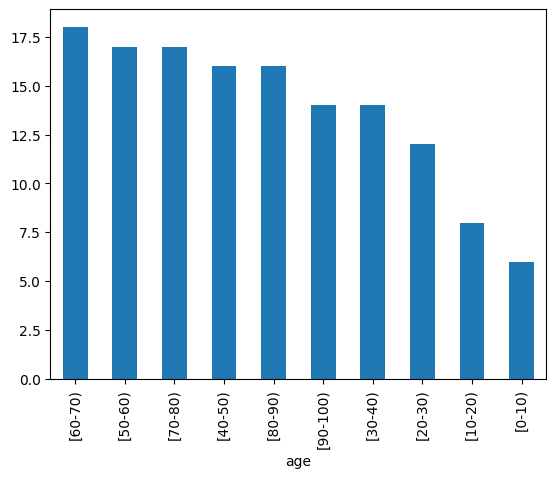

In [28]:
##Refine data of patients using meds by using groupby to divide age ranges, and integer value of the mean value of meds per age group, then plotting in basic bar graph##

MedsTidy=Meds.groupby(['age'])['num_medications'].mean().sort_values(ascending=False).astype(int)
print(MedsTidy)
MedsTidy.plot(kind='bar')

gender
Unknown/Invalid    21
Female             17
Male               16
Name: num_medications, dtype: int64


<Axes: xlabel='gender'>

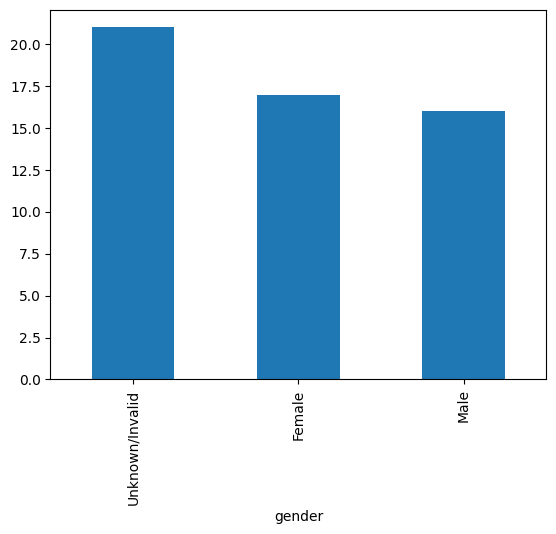

In [29]:
MedsGend=Meds.groupby(['gender'])['num_medications'].mean().sort_values(ascending=False).astype(int)
print(MedsGend)
MedsGend.plot(kind='bar')


age
[0-10)       6
[10-20)      8
[20-30)     12
[30-40)     14
[40-50)     16
[50-60)     17
[60-70)     18
[70-80)     17
[80-90)     16
[90-100)    14
Name: num_medications, dtype: int64


<Axes: title={'center': 'Number of Medications by Age'}, xlabel='Age', ylabel='Number of Medications'>

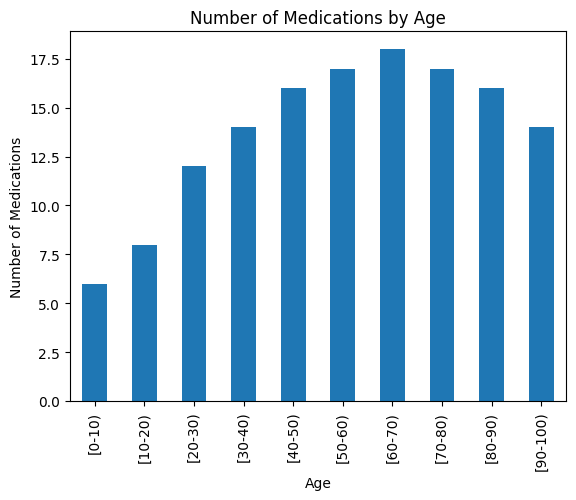

In [30]:
##Refine data of patients using meds by using groupby to divide age ranges, and integer value of the mean value of meds per age group, then plotting in basic bar graph##

MedsTidy=Meds.groupby(['age'])['num_medications'].mean().astype(int)
print(MedsTidy)
MedsTidy.plot(kind='bar', xlabel='Age', ylabel='Number of Medications', title='Number of Medications by Age')

gender
Female    17
Male      16
Name: num_medications, dtype: int64


<Axes: xlabel='gender'>

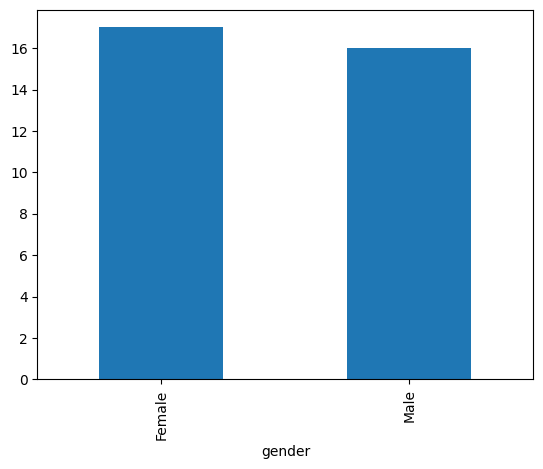

In [31]:
##removing all unwanted instances of Unknown/Invalid in Gender column, and simple bar graph showing mean value of number of meds by gender##

MedsGendClean = MedsGend.drop(['Unknown/Invalid'])
print(MedsGendClean)
MedsGendClean.plot(kind='bar')

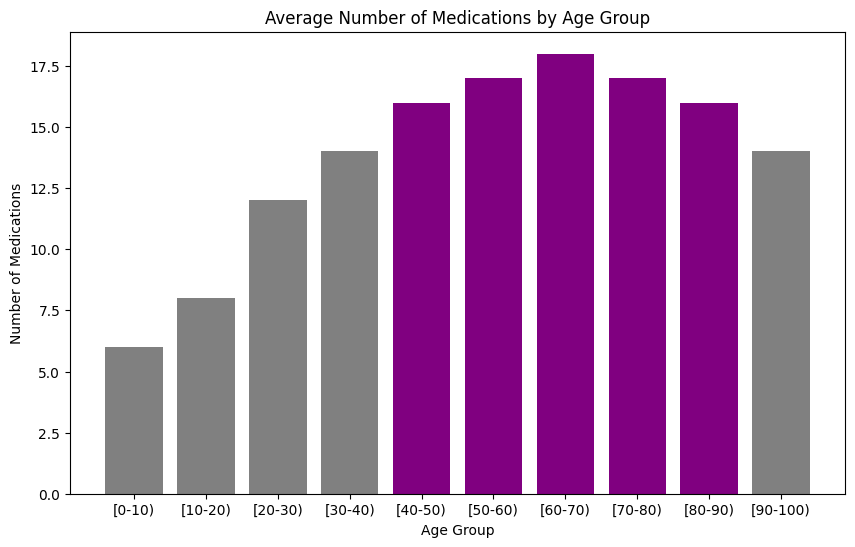

In [32]:
# prompt: Using matplotlib, plot a bar chart for MedsTidy data frame and color all bars in the age axis valued at more than 15 purple, with the other bars grey.

import matplotlib.pyplot as plt

MedsTidy = Meds.groupby(['age'])['num_medications'].mean().astype(int)

plt.figure(figsize=(10, 6))

# Create a list of colors based on the values in MedsTidy
colors = ['purple' if value > 15.0 else 'grey' for value in MedsTidy]

# Plot the bar chart
plt.bar(MedsTidy.index, MedsTidy, color=colors)



# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Medications')
plt.title('Average Number of Medications by Age Group')

# Show the plot
plt.show()


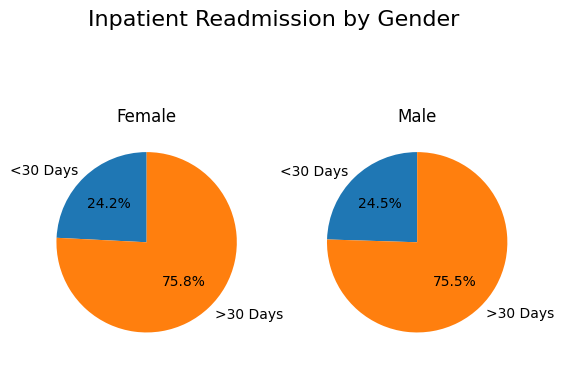

In [33]:
# prompt: Using matplotlib, plot a pie chart for percentage of encounter_id entries showing values "<30" vs. ">30" for the "readmitted" field for "gender = Female" and for "gender = Male" side by side. Title for pie chart = "Inpatient Readmission by Gender"

import matplotlib.pyplot as plt

# Create data for the pie charts
labels = ['<30 Days', '>30 Days']

female_data = [
    len(Meds.loc[(Meds['gender'] == 'Female') & (Meds['readmitted'] == '<30')]),
    len(Meds.loc[(Meds['gender'] == 'Female') & (Meds['readmitted'] == '>30')]),
]

male_data = [
    len(Meds.loc[(Meds['gender'] == 'Male') & (Meds['readmitted'] == '<30')]),
    len(Meds.loc[(Meds['gender'] == 'Male') & (Meds['readmitted'] == '>30')]),
]

# Create the pie charts
fig, axs = plt.subplots(1, 2)

axs[0].pie(female_data, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Female')

axs[1].pie(male_data, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Male')

# Set the title for the overall figure
fig.suptitle('Inpatient Readmission by Gender', fontsize=16)

# Show the plot
plt.show()


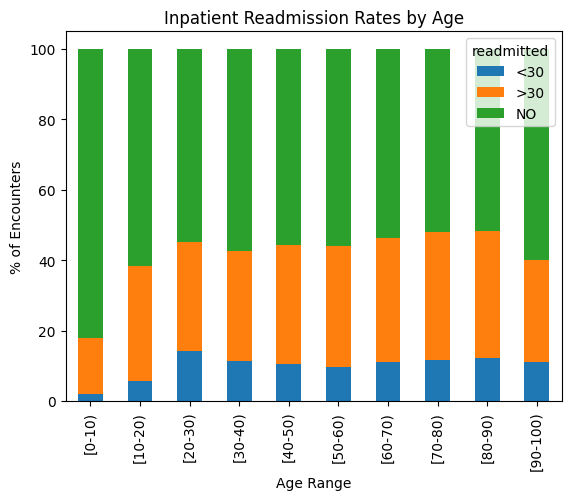

In [34]:
# prompt: Using matplotlib, plot a bar chart for percentage of encounter_id entries showing values "<30" vs. ">30" for the "readmitted" field for each value in the "age" field

# Group data by age and readmitted status
grouped_data = df.groupby(['age', 'readmitted']).size().unstack()

# Calculate percentages
percentages = grouped_data.apply(lambda x: 100 * x / x.sum(), axis=1)

# Plot bar chart
percentages.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('% of Encounters')
plt.title('Inpatient Readmission Rates by Age')

# Show the plot
plt.show()


In [35]:
A1c = Meds['A1Cresult'].value_counts()
A1c

A1Cresult
>8      7413
Norm    3733
>7      3072
Name: count, dtype: int64

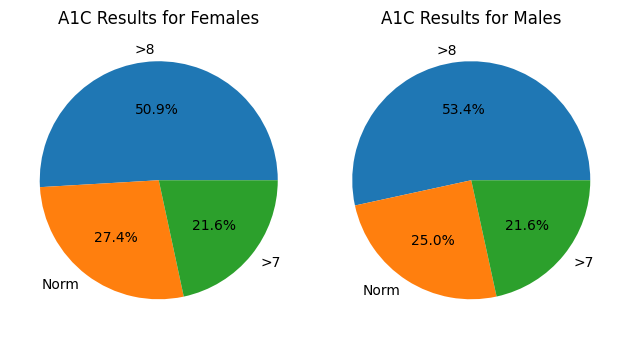

In [36]:
# prompt: Plot results of data frame "A1c" in a pie chart by percentage of values for "A1Cresult" for "gender = Female" AND results of data frame "A1c" in a pie chart by percentage of values for "A1Cresult" for "gender = Male", displayed side by side

import matplotlib.pyplot as plt

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the pie chart for females
A1c_female = Meds[Meds['gender'] == 'Female']['A1Cresult'].value_counts()
ax1.pie(A1c_female, labels=A1c_female.index, autopct="%1.1f%%")
ax1.set_title('A1C Results for Females')

# Plot the pie chart for males
A1c_male = Meds[Meds['gender'] == 'Male']['A1Cresult'].value_counts()
ax2.pie(A1c_male, labels=A1c_male.index, autopct="%1.1f%%")
ax2.set_title('A1C Results for Males')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In concluding, I was able to show a correlation between the age groups, average # of medications, and readmission rates using the above graphs. The data shows that the age range for 20-30 had a higher instance of inpatient readmission in less than 30 days because the average # of medications was one of the lowest in all age groups. There was, however, very little difference in performance for gender in relation to inpatient readmission and number of medications for the 20-30 age group.